# Analyze  challenge for Samvarta Internship

This challenge will take an expert < 2 hours to complete.   
If you are new and learning, it may take up to 3 days.   


We will load a .csv file, clean it and then process some numbers.

**Step 1: Make a copy of this file in your collab / google drive environment.**   
THIS STEP IS IMPORTANT.

**Step 2: Import needed modules**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

**Step 3: Upload data.**   
Please download the the csv file from :    https://samvarta.org/testdata.csv   
Then run the cell below.   
You have a few seconds to select the file to upload, otherwise the cell will end on its own. Just re-run the cell if that happens.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Step 4: Read csv file into pandas and look at some values**

In [35]:
# Define column names by hand for easier clean up.
columnnames=['SerialNumber', 'Tehsil', 'Block',
                        'Village', 'FullName', 'FathersFullName',
                        'Age', 'Sex', 'PhoneNumber',
                        'IDProof', 'IDNumber', 'ArrivalDate',
                        'SourceCity', 'SourceCheckup', 'Skill', 'YrsExp',
                        'OtherSkills', 'CompanyName', 'Comments']


# use pd.read_csv to read the csv. Skip the first row, and use the column names above
### FILL CODE HERE

df=pd.read_csv('/content/testdata.csv')
df_new = df.rename(columns={ '1':'SerialNumber','2':'Tehsil','3':'Block','4':'Village','5':'FullName','6':'FathersFullName','7':'Age','8':'Sex','9':'PhoneNumber','10':'IDProof','11':'IDNumber','12':'ArrivalDate','13':'SourceCity','14':'SourceCheckup','15':'Skill','16':'YrsExp','17':'OtherSkills','18':'CompanyName','19':'Comments'})

### look at the dataframe using .head()
df_new.head()
df_new

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,MALE,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,130,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,32.0,म,12345678,AADHAR,9999999999,05-11-2020,अहमदाबाद,YES,मजदूरी,6 माह,NaN,NaN,NaN
706,131,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,18.0,पु0,12345678,AADHAR,9999999999,05-11-2020,अहमदाबाद,YES,मजदूरी,6 माह,NaN,NaN,NaN
707,132,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,45.0,पु0,12345678,AADHAR,9999999999,05-11-2020,अहमदाबाद,YES,मजदूरी,6 माह,NaN,NaN,NaN
708,133,BASTI SADAR,BAHADURPUR,Deidentified,Deidentified,Deidentified,13.0,पु0,12345678,AADHAR,9999999999,05-11-2020,अहमदाबाद,YES,मजदूरी,6 माह,NaN,NaN,NaN


**Step 5: Lets try to analyze gender (and clean it)**   
List all the unique values in the Sex column.   
You will see many different variations.    
These will be cleaned in Step 6


In [5]:
### Print all unique values in the sex column
print("Current Unique values in Sex (and counts):")
print(df_new.Sex.unique())
df_new['Sex'].nunique()

### FILL CODE HERE


Current Unique values in Sex (and counts):
['MALE' 'F' 'M' 'FEMALE' 'पु0' 'म0' 'ड' nan 'म']


8

**Step 6: Fix the bad data**   
We only want this column to contain M or F.   
We will manually change values which contain bad values such as MALE, FEMALE, ड, म0, म and so on.

Updated unique values in Sex:
M    662
F     45
U      2
Name: Sex, dtype: int64


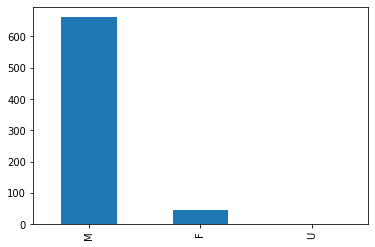

In [6]:
ds = df_new.copy() # Make changes in a new dataframe

# Replace bad values in Sex using the following table
# "MALE" -> "M"
# "FEMALE" -> "F"
# "पु0" -> "M"
# "म0" -> "F"
# "म" -> "F"
# # Replace bad values, nans or Unknown values with Unknown -> U
# nan -> "U"
# "ड" -> "U"




print("Updated unique values in Sex:")
### FILL CODE HERE
ds.replace(["MALE","पु0"], "M",inplace=True) 
ds.replace(["FEMALE", "म0","म"],"F",inplace=True) 
ds.replace(["nan","ड"], "U",inplace=True)
print(ds.Sex.value_counts())
ds['Sex'].value_counts().plot(kind='bar')

**Step 7: Lets look at data and see what else can we fix**

In [7]:
### use the .head() command to show the table again
ds.head()

,SerialNumber,Tehsil,Block,Village,FullName,FathersFullName,Age,Sex,PhoneNumber,IDProof,IDNumber,ArrivalDate,SourceCity,SourceCheckup,Skill,YrsExp,OtherSkills,CompanyName,Comments
0,1,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,15.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,7 MONTH,NaN,NaN,NaN
1,2,BASTI SADAR,BAHADUR PUR,Deidentified,Deidentified,Deidentified,22.0,M,12345678,ADHAR,9999999999,09-05-2020,MUMBAI,YES,LABOUR,5 MONTHS,NaN,NaN,NaN
2,3,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,20.0,F,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
3,4,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN
4,5,BASTI SADAR,Bahadur pur,Deidentified,Deidentified,Deidentified,21.0,M,12345678,NaN,9999999999,29-04-2020,Prayagraj,YES,NaN,NaN,NaN,NaN,NaN


**Step 8: Change all Block names to Bahadurpur**   
Looks like they can contain different spellings or variations. Just fix all to the same value.

In [8]:
print("Block names before cleaning")
### FILL CODE HERE FOR THE OUTPUT BELOW
ds.Block.value_counts()

Block names before cleaning


BAHADURPUR     447
बहादुरपुर       80
BHADHUR PUR     69
BAHADUR PUR     61
BHADHUR         11
BHADHURPUR       9
BHADURPUR        7
Bhadhur pur      6
Bahadur pur      5
Bhadhurpur       4
BAHDURPR         3
Bahadur Pur      3
Bahdhur          2
BAHDURPUR        2
Bhadhur          1
Name: Block, dtype: int64

In [9]:
### Fill code here to replace all "Block" values with "BAHADURPUR"
print("Block names after cleaning:")
ds.replace(["बहादुरपुर","BHADHUR PUR","BAHADUR PUR","BHADHUR","BHADHURPUR","BHADURPUR","Bhadhur pur","Bahadur pur","Bhadhurpur","Bahadur Pur","BAHDURPR","Bahdhur","BAHDURPUR","Bhadhur"],"BAHADURPUR",inplace=True)

### Fill code to show values and counts
ds.Block.value_counts()

Block names after cleaning:


BAHADURPUR    710
Name: Block, dtype: int64

**Let's look at possible city names**

In [10]:
### Fill code here to print all city names
col_values=ds['SourceCity'].values.ravel()
value=pd.unique(col_values)
print(value)
print(ds['SourceCity'].value_counts())


['MUMBAI' 'Prayagraj' 'DELHI' 'INDORE' 'FARIDABAD' 'HYDRABAD' 'GUJRAT'
 'MADHYA PRADESH' 'ANDHRA PRADESH' 'GURGAON' 'AHAMADABAD' 'KANPUR'
 'ALIGARH' 'GONDA' nan 'AMRITSAR' 'RAJASTHAN' 'BOMBAY' 'BALLABHGARH'
 'NOIDA' 'AHEMADABAD' 'NAGPUR' 'MATHURA' 'AHAMDABAD' 'BHIMANDI' 'THANE'
 'PUNE' 'SURAT' 'HAPUR' 'SAHARANPUR' 'HARYANA' 'BHIWNDI' 'AHMEDABAD'
 'TELANGANA' 'HARIYANA' 'BHIWANDI' 'JALGAUV' 'RAJSTHAN' 'MAHARASTRA'
 'KERALA' 'BRODARA' 'BANGOLORE' 'KERLA' 'MHARSATRA' 'LUCKNOW' 'GUDGAWA'
 'NAGH PUR' 'MHARASTRA' 'AMDABAD' 'BANGLOR' 'JHASI' 'PUNA' 'SAHARAN PUR'
 'HARAYAN' 'CHNADI GHAR' 'GAZIYABAD' 'NASIK' 'VASAI MUMBAI' 'BEGLORE'
 'ULWAY MUMBAI' 'मुम्बई' 'मुम्बई भिवडी' 'सूरत' 'हैदराबाद' 'तेलंगाना'
 'लुधियाना' 'हापुड' 'मुम्बई मानखुर्द एकतानगर' 'गुजरात गोधरा' 'थाने' 'वसई'
 'बसई' 'अन्धेरी बेस्ट' 'पुणे' 'गुजरात' 'केरल' 'MUMBAI CST' 'AHAMADNAGAR'
 'BELAUR' 'NIGOJ' 'MMBAI' 'MAHARSHTRA' 'fnYyh' 'Fkkus' 'eqEcbZ' 'POONA'
 'MUMABAI' 'HENFRABAD' 'HAIDRABAD' 'BANGLORE' 'RAJESTHA' 'SOLAPUR' 'AGRA'
 'JAMM

**Challenge 1: Fix city names**   
The city names are dirty, for example:   
HAIDRABAD, Hyderabad, Hyderabad   
BANGLORE, BANGALORE, Bangalore, Begolore   
GUJRAT, GUJARAT, GUJRAAT   
AGARA, AGRA   
कानपुर, Kanpur    
Mumbai, MUMABAI, मुम्बई, मुम्बई भिवडी, VASAI MUMBAI

   

Your challenge is to fix these names.   
One way is to replace them manually like we have done above for the Sex column.   
Another way to do it is to use a look up table for replacements.   
Use this to clean city names.   

We have provided a look up table here (file: cityreplacement.csv):
https://drive.google.com/file/d/1CTlnwK-wfmqMrQ0g6K5dbDQ_-IhpGCLm/view?usp=sharing   

You can use the upload file method above to upload this table and use it for replacements.

At the end of this task there should not be more than 1 variation for every city.

Mumbai                 329
Gujarat                 45
Delhi                   37
Ahmedabad               29
Bhiwandi                24
Prayagraj               22
Ballabhgarh             16
Rajasthan               14
Kerela                  13
Pune                    12
Hyderabad               12
Agra                    10
Bangalore               10
Telangana                9
Surat                    9
Maharashtra              9
Kanpur                   8
unknown                  8
Vasai                    7
HARIYANA                 6
Nagpur                   6
Haryana                  6
Thane                    4
Gurugram                 4
Gonda                    4
Ludhiana                 4
Solapur                  4
Saharanpur               4
Faridabad                4
Andra Pradesh            4
MAHARSHTRA               4
Madhya Pradesh           3
Ekta Nagar Mankhurd      2
Aligarh                  2
Nashik                   2
Amritsar                 2
Jhansi                   2
H

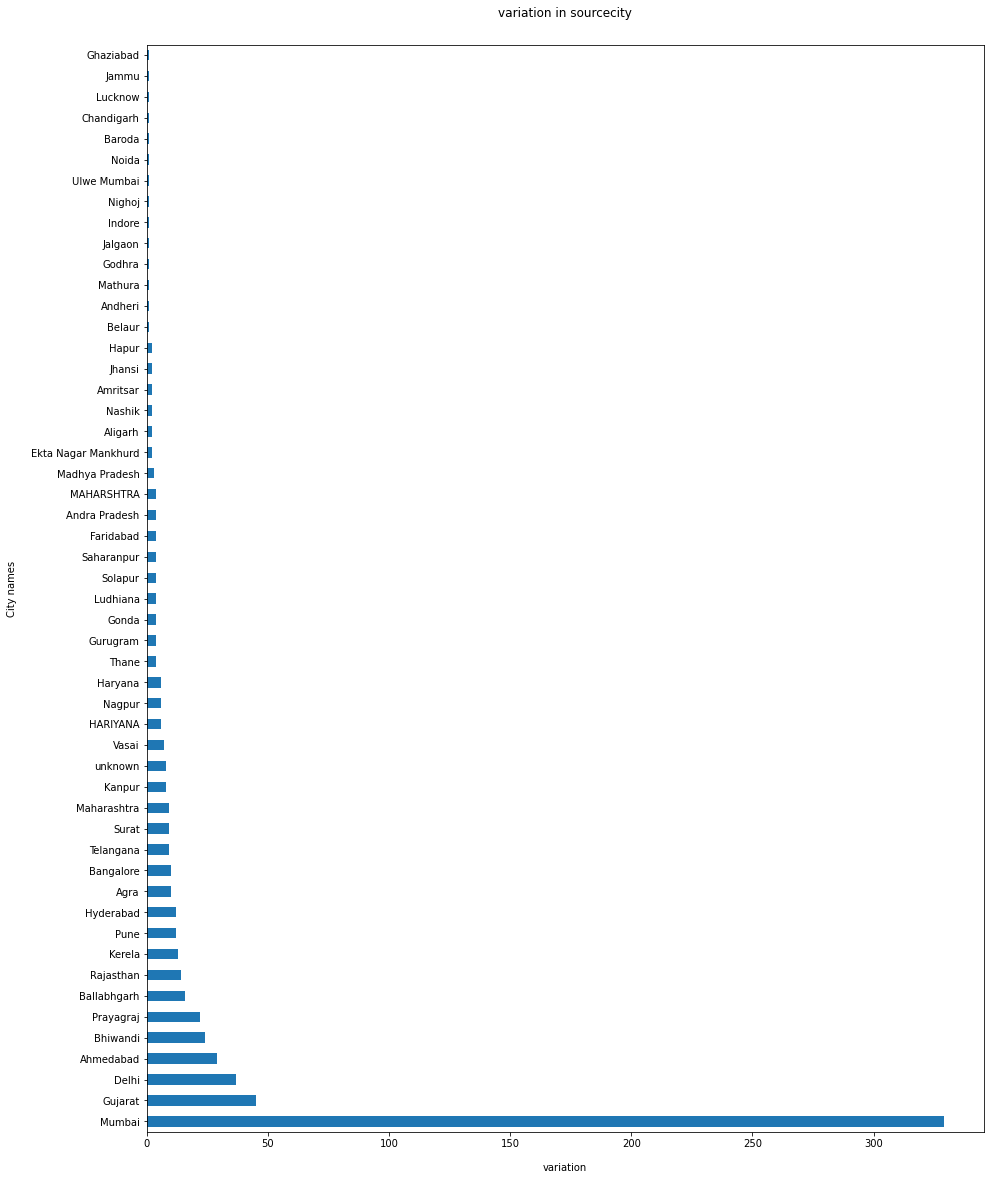

In [11]:
### Option 1: Add code (or code cells) here to replace city names manually.
### Option 2: (Preferred) Add code (or code cells) here to upload file cityreplacement.csv 
### and clean city names using code
ds.replace(["HAIDRABAD"," Hyderabad","HYDRABAD","हैदराबाद","HENFRABAD"],"Hyderabad",inplace=True)
ds.replace(["MUMBAI","मुम्बई","MUMBAI CST","MMBAI","MUMABAI","BOMBAY"],"Mumbai",inplace=True)
ds.replace(["DELHI"],"Delhi",inplace=True)
ds.replace(["INDORE"],"Indore",inplace=True)
ds.replace(["FARIDABAD"],"Faridabad",inplace=True)
ds.replace(["GUJRAT","गुजरात","GUJRAAT"],"Gujarat",inplace=True)
ds.replace(["MADHYA PRADESH"],"Madhya Pradesh",inplace=True)
ds.replace(["ANDHRA PRADESH"],"Andra Pradesh",inplace=True)
ds.replace(["BANGLORE","BANGOLORE","BANGLOR","BEGLORE","BANGLORE","BEGOLOR"],"Bangalore",inplace=True)
ds.replace(["AHAMADABAD","AHEMADABAD","AHAMDABAD","AHMEDABAD","AMDABAD","AHMADABAD","अहमदाबाद","AHAMADNAGAR"],"Ahmedabad",inplace=True)
ds.replace(["KANPUR","कानपुर"],"Kanpur",inplace=True)
ds.replace(["GURGAON","GUDGAWA"],"Gurugram",inplace=True)
ds.replace(["RAJASTHAN","RAJSTHAN","RAJESTHA"],"Rajasthan",inplace=True)
ds.replace(["AGARA","AGRA"],"Agra",inplace=True)
ds.replace(["POONA","पुणे","PUNA","PUNE"],"Pune",inplace=True)
ds.replace(["JAMMU"],"Jammu",inplace=True)
ds.replace(["fnYyh","Fkkus","eqEcbZ","nan"],"unknown",inplace=True)
ds.replace(["NIGOJ"],"Nighoj",inplace=True)
ds.replace(["केरल","KERALA","KERLA"],"Kerela",inplace=True)
ds.replace(["VASAI MUMBAI","वसई","बसई"],"Vasai",inplace=True)
ds.replace(["BELAUR"],"Belaur",inplace=True)
ds.replace(["SAHARANPUR","SAHARAN PUR"],"Saharanpur",inplace=True)
ds.replace(["अन्धेरी बेस्ट"],"Andheri",inplace=True)
ds.replace(["थाने","THANE"],"Thane",inplace=True)
ds.replace(["हापुड","HAPUR"],"Hapur",inplace=True)
ds.replace(["लुधियाना"],"Ludhiana",inplace=True)
ds.replace(["तेलंगाना","TELANGANA"],"Telangana",inplace=True)
ds.replace(["सूरत","SURAT"],"Surat",inplace=True)
ds.replace(["NASIK"],"Nashik",inplace=True)
ds.replace(["GAZIYABAD"],"Ghaziabad",inplace=True)
ds.replace(["CHNADI GHAR"],"Chandigarh",inplace=True)
ds.replace(["HARAYAN","HARYANA"],"Haryana",inplace=True)
ds.replace(["JHASI"],"Jhansi",inplace=True)
ds.replace(["NAGH PUR","NAGPUR"],"Nagpur",inplace=True)
ds.replace(["LUCKNOW"],"Lucknow",inplace=True)
ds.replace(["BRODARA"],"Baroda",inplace=True)
ds.replace(["JALGAUV"],"Jalgaon",inplace=True)
ds.replace(["BHIWANDI","BHIWNDI","BHIMANDI","मुम्बई भिवडी"],"Bhiwandi",inplace=True)
ds.replace(["MATHURA"],"Mathura",inplace=True)
ds.replace(["NOIDA"],"Noida",inplace=True)
ds.replace(["BALLABHGARH"],"Ballabhgarh",inplace=True)
ds.replace(["AMRITSAR"],"Amritsar",inplace=True)
ds.replace(["GONDA"],"Gonda",inplace=True)
ds.replace(["ALIGARH"],"Aligarh",inplace=True)
ds.replace(["मुम्बई मानखुर्द एकतानगर"],"Ekta Nagar Mankhurd",inplace=True)
ds.replace(["ULWAY MUMBAI"],"Ulwe Mumbai",inplace=True)
ds.replace(["MAHARASTRA","MHARSATRA","MHARASTRA"],"Maharashtra",inplace=True)
ds.replace(["गुजरात गोधरा"],"Godhra",inplace=True)
ds.replace(["SOLAPUR"],"Solapur",inplace=True)

print(ds.SourceCity.value_counts())
#ds['SourceCity'].value_counts().plot(kind='bar')
ds['SourceCity'].value_counts().plot(kind='barh', figsize=(15, 20))
plt.xlabel("variation", labelpad=14)
plt.ylabel("City names", labelpad=14)
plt.title("variation in sourcecity", y=1.02);



**Challenge 2: Hard**   
Clean the YrsExp column   
This column can contain many dirty values.    
After clean up, all this column should contain is a number.   
Any years > 10 should be replaced by 10,   
and any value in months should be replaced by 0.   
    
This column can contain these values:   
['7 MONTH' '5 MONTHS' nan '2 YEARS' '1 YEAR' '6 MONTHS' '3 YEARS'
 '2 MONTHS' '5 YEAR' '7 MONTHS' '3 YEAR' '2 YEAR' '6 YEARS' '7 YEARS'
 '4 MONTHS' '4' '6' '7' '2' '8' '15' '5' '10 YEAR' '8 year' '25 YEARS' '3'
 '1' '1YEAR' '5 YEARS' '1 YERS' '06 MONTHS' '05 YEARS' '03 YEARS'
 '04 MONTHS' '02 YEARS' '03 MONTHS' '02 MONTHS' '01 YEARS' '4 YEARS' '10'
 '13' '3YEAR' '6YRS.' '5YRS.' '4YRS.' '7YRS.' '10YRS.' '9YRS.' '3 MOTH'
 '5 MONTH' '20' '6 YEAR' '33' '18' '11' '4 YEAR' '6 Month' '2 MONTH'
 '15 YEAR' '25' '40' '19' '27' '7 YEAR' '17 YEAR' '8 YEAR' '9 YEAR'
 '15 YEARS' '3 MONTH' '11 MONTHS' '6 MONTH' '11 YEARS' '10 YEARS'
 '12 YEARS' '8 MONTH' '9' '30' '12' '4 MONTH' '5 YERS' '3साल' '10साल'
 '1साल' '7साल' '5साल' '3 माह' '2 माह' '3 साल' '2 साल' '4साल' '2साल'
 '18साल' '30साल' '11साल' '40साल' '12साल' '6माह' '3माह' '13साल' '8साल'
 '3 वर्ष' '10 वर्ष' '8 माह' '7 वर्ष' '9वर्श' '3 बर्ष' '5 वर्ष' '5 माह'
 '8 वर्ष' '4 वर्ष' '2 वर्ष' '1 वर्ष' '6 माह' '4माह' '5 साल' '25 साल'
 '9 साल' '5माह' '6साल' '4Y' '20 YEARS' '40 YEAR' '5Y' '12 YEAR' '2MONTHS'
 '9o"kZ' '5o"kZ' '3o"kZ' '20o"kZ' '25o"kZ' '6MONTH' '10YEARS' '2YRS.'
 '2 YRS.' '2YRS' '1YRS' '8YRS' '2YEAR' '3YEAT' '5 YS' '8 MONTHS' '4 YS'
 '6 MTH' '15 YS' '22' '14' '30YEAR' '28' '12 साल' '1 साल' '15 साल'
 '20 साल' '10 साल' '4 साल']   
    
   
**Use your programming skills to clean this column**

In [0]:
### Clean the YrsExp Column to a number between 0 and 100
import numpy as np

In [37]:
#Challenge 2

#since in question it is mention that we have to make month equal to 0 so I have taken all possible value of month to single value since in month there is a value -11 month ,so if we take actual values so it will give value 10 to 11month itself thats why I have taken single value.
#since in question it is not mention that what value I have to take if year<10 so I have assumed it to be 0......

#ds['YrsExp'
ds.replace(["nan"],"unknown",inplace=True)
ds.replace(["7 MONTH","5 MONTHS","6 MONTHS","2 MONTHS","7 MONTHS","4 MONTHS","06 MONTHS","04 MONTHS","03 MONTHS","02 MONTHS","3 MOTH","5 MONTH","6 Month","2 MONTH","3 MONTH","11 MONTHS","6 MONTH","8 MONTH","4 MONTH","3 माह","2 माह","6माह","3माह","8 माह","5 माह","6 माह","4माह","5माह","2MONTHS","6MONTH","8 MONTHS","6 MTH"],"1",inplace=True)

ds['YrsExp'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
ds['YrsExp'] = ds['YrsExp'].astype('float64')
#for value in ds['YrsExp']:
#ds['YrsExp']

ds['YrsExp']
result=[]
for value in ds['YrsExp']:
  
  if value > 10:
    result.append(10)
  else:
    result.append(0)
ds['YrsExp']=result
ds['YrsExp']



0      0
1      0
2      0
3      0
4      0
      ..
705    0
706    0
707    0
708    0
709    0
Name: YrsExp, Length: 710, dtype: int64

**Challenge 3: Hardest**   
Clean the city names list using fuzzy string matching. Fuzzy string matching calculates string similarity.   

Some examples:   

String 1|String2|Match Score
:-:|:-:|:-:
Mumbai | Mumabai | 92%
Mumbai | Vasai Mumbai | 66%
Mumbai | Bangalore | 13%
Bagalore | Bangalore | 94%


Using this score, we could replace both the first two examples with 

By using a list of possible options, you can look for matches that have a score higher than 60%, and replace them. You can use the list of options in the second column in this file:   

https://drive.google.com/file/d/1CTlnwK-wfmqMrQ0g6K5dbDQ_-IhpGCLm/view?usp=sharing

Read example tutorial here: https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6   
Experiment with similarity here: https://www.tools4noobs.com/online_tools/string_similarity/

In [39]:
pip install fuzzywuzzy

In [40]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [0]:
def checker(wrong_options,correct_options):
    names_array=[]
    ratio_array=[]    
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
           names_array.append(wrong_option)
           ratio_array.append('100')
        else:   
            x=process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
            names_array.append(x[0])
            ratio_array.append(x[1])
    return names_array,ratio_array

In [0]:
df_Original_List=pd.read_csv("/content/cityreplacements.csv",usecols=["Current Value"])
df_To_beMatched=pd.read_csv("/content/cityreplacements.csv",usecols=["New Value"])

In [0]:
str2Match = df_To_beMatched['New Value'].fillna('######').tolist()
strOptions =df_Original_List['Current Value'].fillna('######').tolist()

In [0]:
name_match,ratio_match=checker(str2Match,strOptions)
df1 = pd.DataFrame()
df1['String1']=pd.Series(str2Match)
df1['String2']=pd.Series(name_match)
df1['match_ratio']=pd.Series(ratio_match)
df1.to_csv('matched_names.csv')

In [61]:
df1

,String1,String2,match_ratio
0,Mumbai,MUMBAI,100
1,Prayagraj,Prayagraj,100
2,Delhi,DELHI,100
3,Indore,INDORE,100
4,Faridabad,FARIDABAD,100
...,...,...,...
95,Bangalore,BANGLORE,94
96,Agra,AGRA,100
97,Ahmedabad,AHMEDABAD,100
98,Kanpur,KANPUR,100


## **Bonus Points: Analysis**   
Show us analysis you can do on this data in terms of visualizations or plots (or any other).

## Send a link to this file back to us for evaluation.
Use the share button on top and **make sure anyone with link can view this file** (not edit it).   
See help below.

Then send us the link using internshaala chat.

![picture](https://i.imgur.com/nCb9AZrl.jpg)